<a href="https://colab.research.google.com/github/icaroluis4/python-forecasts/blob/main/DEMO_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
import yfinance as yf

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 17 ,11

In [ ]:
its4 = yf.Ticker("ITUB4.SA")

hist = its4.history(start="2010-01-01" , end = "2019-12-12")

df = hist

df.head() , print(len(df))

2469


(                 Open       High        Low      Close    Volume  Dividends  \
 Date                                                                          
 2010-01-04  10.811473  11.256276  10.811473  11.153416  11843397        0.0   
 2010-01-05  11.181220  11.225700  11.092259  11.225700   8593315        0.0   
 2010-01-06  11.189563  11.256284  11.036663  11.128404  10602572        0.0   
 2010-01-07  11.050560  11.133961  10.994959  11.014421   9966567        0.0   
 2010-01-08  11.058890  11.058890  10.819809  10.847610   9748709        0.0   
 
             Stock Splits  
 Date                      
 2010-01-04           0.0  
 2010-01-05           0.0  
 2010-01-06           0.0  
 2010-01-07           0.0  
 2010-01-08           0.0  , None)

In [ ]:
df = df.iloc[: ,3:4]

df

,Close
Date,
2010-01-04,11.153416
2010-01-05,11.225700
2010-01-06,11.128404
2010-01-07,11.014421
2010-01-08,10.847610
...,...
2019-12-05,33.684467
2019-12-06,33.075542
2019-12-09,33.721359


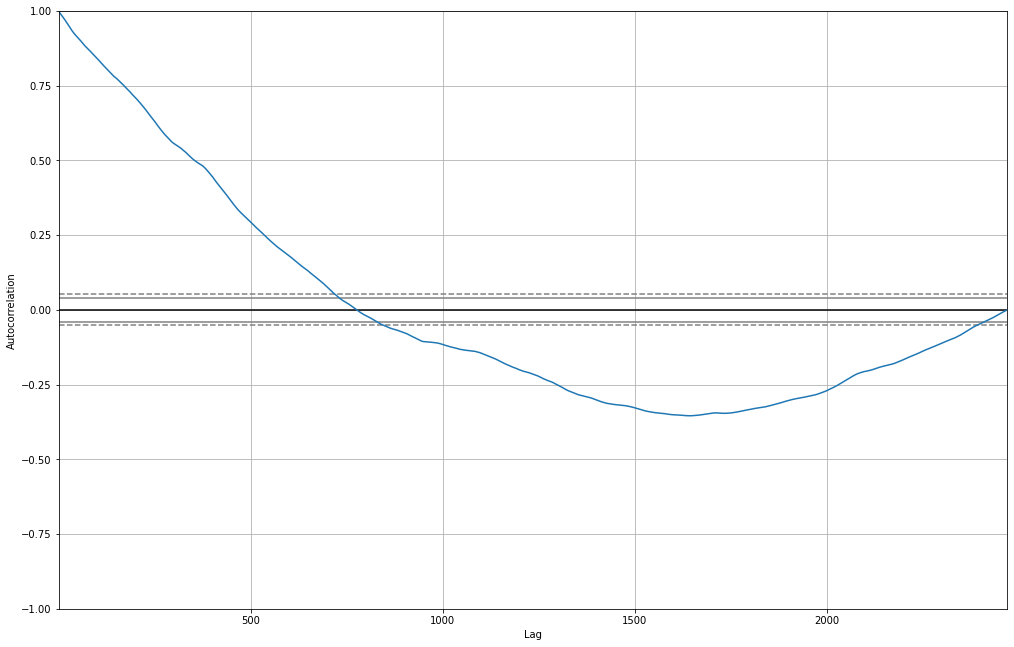

In [ ]:
# autocorrelation plot
autocorrelation_plot(df)
pyplot.show()

In [ ]:
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

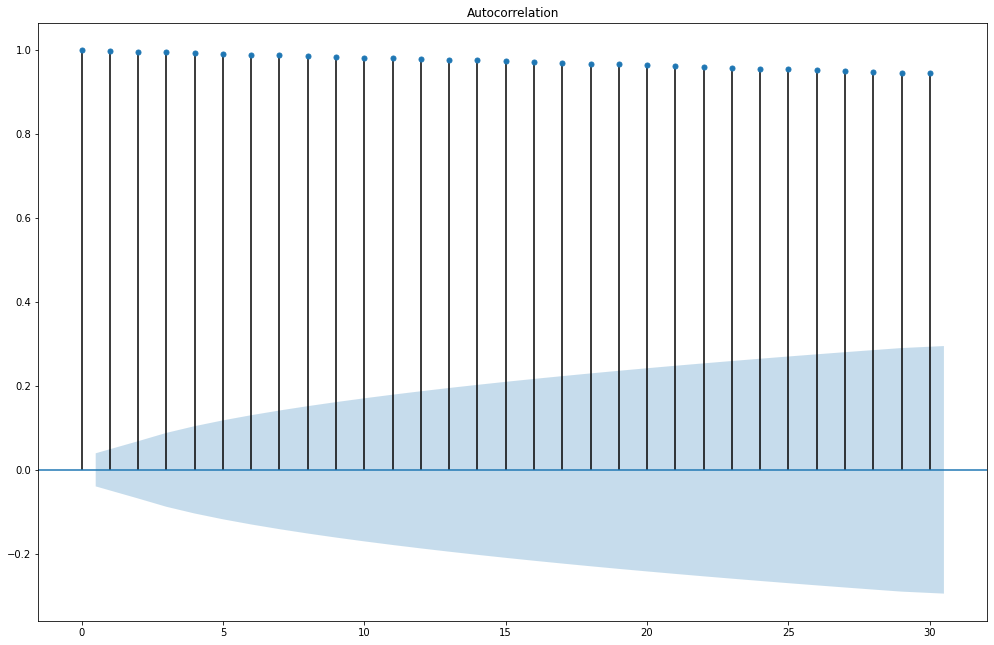

In [ ]:
plot_acf( df , lags=30)
pyplot.show()

In [ ]:
size =  2100 #int(len(df)/2)
#print(metade)

training_data = df[: size]
testing_data = df[ size:]




df.shape, training_data.shape , testing_data.shape

((2469, 1), (2100, 1), (369, 1))

In [ ]:
# fit model
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# ARIMA(p,d,q)
model = ARIMA( training_data , order=(3,1,1))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

In [ ]:
model_fit = model.fit()

In [ ]:
# summary
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2099
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -223.567
Method:                       css-mle   S.D. of innovations              0.269
Date:                Tue, 27 Sep 2022   AIC                            459.134
Time:                        15:38:07   BIC                            493.029
Sample:                             1   HQIC                           471.549
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0053      0.005      0.957      0.338      -0.006       0.016
ar.L1.D.Close    -0.1610      0.271     -0.594      0.552      -0.692       0.370
ar.L2.D.Close    -0.0026      0.022     

In [ ]:
# plot residuais
#from pandas import DataFrame
residuals = pd.DataFrame(model_fit.resid)

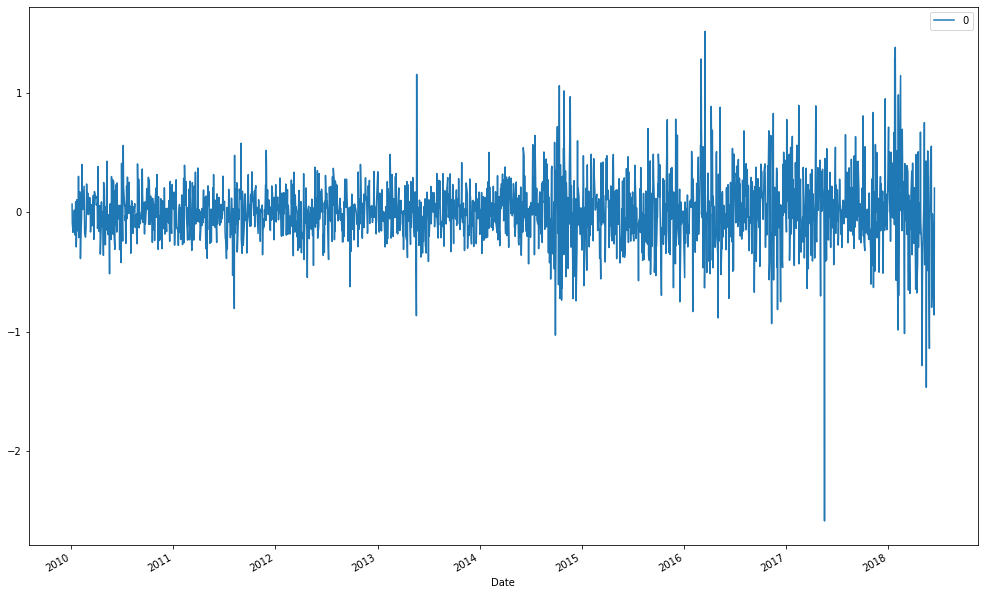

In [ ]:
residuals.plot()
pyplot.show()

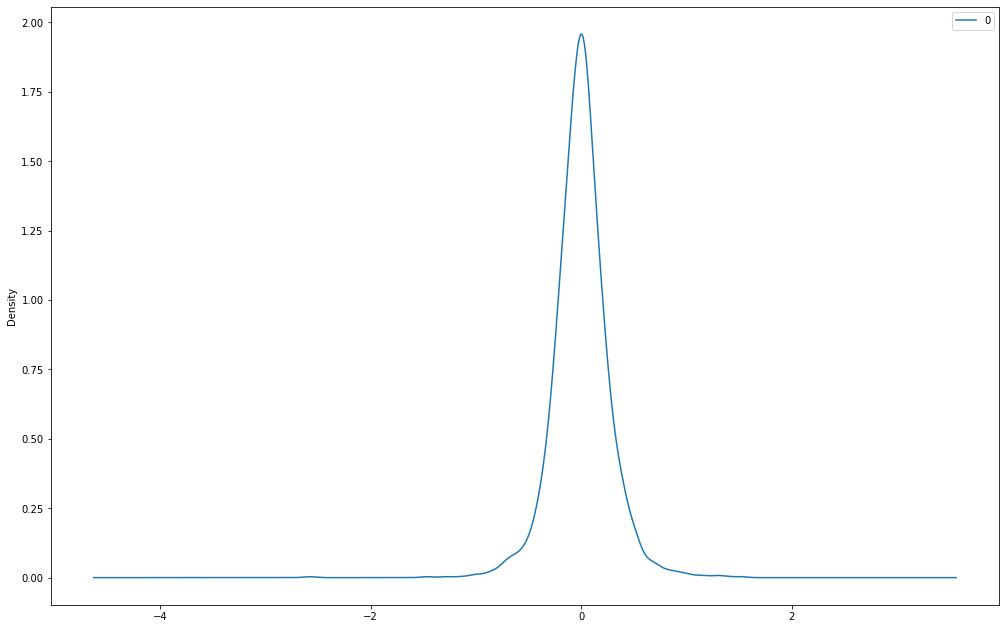

In [ ]:
# gráficos de densidade dos residuais
residuals.plot(kind='kde')
pyplot.show()

In [ ]:
# estatística descritiva dos residuos
print(residuals.describe())

                  0
count  1.233000e+03
mean  -7.826996e-07
std    2.039469e-01
min   -1.021117e+00
25%   -1.165223e-01
50%    9.171238e-04
75%    1.101021e-01
max    1.155422e+00


In [ ]:
#salvando o index das datas
datas = []

#for i in range(3):
#  datas = testing_data['Date'][i]

index = df.index
print(index[3 :])

DatetimeIndex(['2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14', '2010-01-15', '2010-01-18',
               '2010-01-19', '2010-01-20',
               ...
               '2019-11-28', '2019-11-29', '2019-12-02', '2019-12-03',
               '2019-12-04', '2019-12-05', '2019-12-06', '2019-12-09',
               '2019-12-10', '2019-12-11'],
              dtype='datetime64[ns]', name='Date', length=2466, freq=None)


In [ ]:
# a variável X recebe os dados da série
X = df.values
X = X.astype('float32')

In [ ]:
# Separa os dados com 50% dos dados para treino e 50% dos dados para teste
size = 2100 #int(len(X) * 0.50)

In [ ]:
train = X[:size] #train = X[0:size]
test =  X[size:] #test =  X[size:]

In [ ]:
# cria a variável history         --RESET PARA FAZER NOVAMENTE
history = [x for x in train]

In [ ]:
# cria lista de previsões        -RESET PARA FAZER NOVAMENTE
predictions = list()

In [ ]:
# Cria a função que faz a diferenciação
def difference(dataset, interval=1):
  diff = list()
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return diff

# cria função que reverte o valor diferenciado para o original
def inverse_difference(history, previsao, interval=1):
  return previsao + history[-interval]

In [ ]:
# inicia Walk-Forward
for t in range(len(test)):

  # difference data
  dias_no_ano = 3
  diff = difference(history, dias_no_ano)

  # cria um modelo ARIMA com os dados de history
  model = ARIMA(diff, order=(3,1,1))

  # treina o modelo ARIMA
  model_fit = model.fit(trend='nc', disp=0)

  # a variável valor_predito recebe o valor previsto pelo modelo
  valor_predito = model_fit.forecast()[0]

  # valor_predito recebe o valor revertido (escala original)
  valor_predito = inverse_difference(history, valor_predito, dias_no_ano)

  # adiciona o valor predito na lista de predicões
  predictions.append(valor_predito)

  # a variável valor_real recebe o valor real do teste
  valor_real = test[t]

  # adiciona o valor real a variável history
  history.append(valor_real)

  # imprime valor predito e valor real
  print('Valor predito=%.3f, Valor esperado=%3.f' % (valor_predito, valor_real))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Valor predito=22.048, Valor esperado= 22
Valor predito=20.953, Valor esperado= 23
Valor predito=22.706, Valor esperado= 23
Valor predito=22.746, Valor esperado= 22
Valor predito=22.528, Valor esperado= 23
Valor predito=22.950, Valor esperado= 23
Valor predito=22.167, Valor esperado= 23
Valor predito=23.199, Valor esperado= 22
Valor predito=22.472, Valor esperado= 23
Valor predito=22.462, Valor esperado= 23
Valor predito=23.089, Valor esperado= 23
Valor predito=23.554, Valor esperado= 24
Valor predito=23.926, Valor esperado= 24
Valor predito=23.955, Valor esperado= 24
Valor predito=24.591, Valor esperado= 24
Valor predito=24.631, Valor esperado= 24
Valor predito=24.234, Valor esperado= 24
Valor predito=24.778, Valor esperado= 25
Valor predito=25.082, Valor esperado= 25
Valor predito=25.445, Valor esperado= 25
Valor predito=25.728, Valor esperado= 26
Valor predito=26.206, Valor esperado= 26
Valor predito=25.562, Valor esperado= 26
Valor predito=26.374, Valor esperado= 27
Valor predito=26

# mean_squared_error

In [ ]:
# Avaliando os resultados
from numpy import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.646


#Colocando os Resultados em um só DataFrame e colocando index

In [ ]:
print(type(test) , type(predictions))

<class 'numpy.ndarray'> <class 'list'>


In [ ]:
df2 = pd.DataFrame(test , columns=["Close"])

In [ ]:
df2['previsão'] = predictions

In [ ]:
index_resultado = index[ size:]

In [ ]:
df2 = df2.set_index(index_resultado)

In [ ]:
print(df2)

                Close              previsão
Date                                       
2018-06-18  21.688963   [22.04842377678159]
2018-06-19  22.667492  [20.953167362247676]
2018-06-20  23.087690   [22.70609638231161]
2018-06-21  22.471792   [22.74574707872693]
2018-06-22  22.644472  [22.528048980119493]
...               ...                   ...
2019-12-05  33.684467  [34.048294512255296]
2019-12-06  33.075542  [33.616963419785534]
2019-12-09  33.721359  [33.760876297969816]
2019-12-10  33.232391   [33.94080791383151]
2019-12-11  32.844891   [32.94957863716512]

[369 rows x 2 columns]


#PLOTAGEM

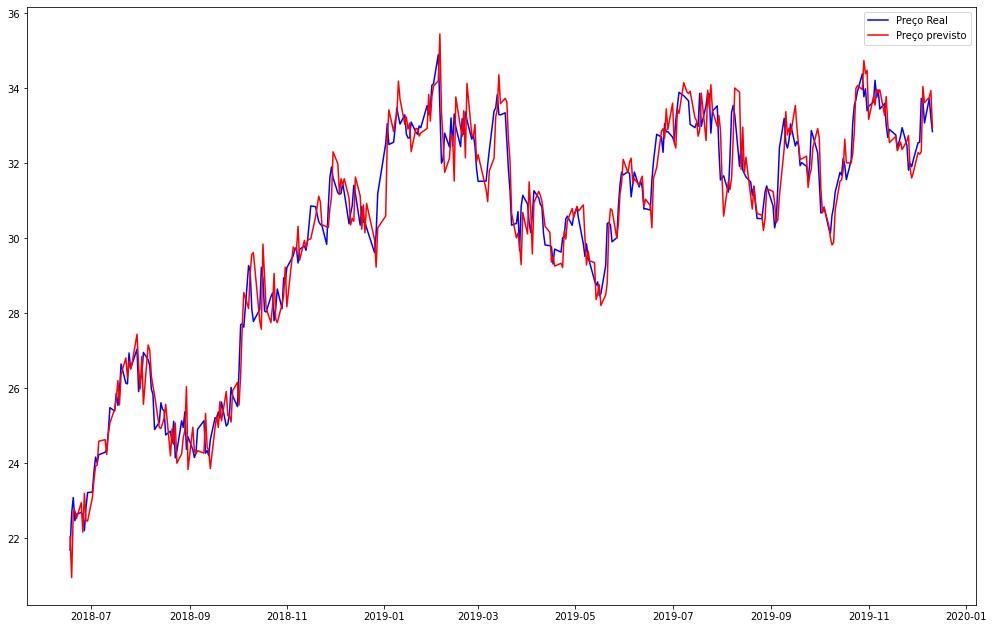

In [ ]:
# plot forecasts against actual outcomes
pyplot.plot(df2['Close'] , color = 'blue' , label = 'Preço Real')
pyplot.plot(df2['previsão'], color='red' ,  label = 'Preço previsto')
pyplot.legend()
pyplot.show()

In [ ]:
cash = 100.0
min = 100.0
max = 100.0

close = 0
prev = 0

putcall = False
longshort = False

acertos = 0
erros = 0

lucroperda = 0

df3 = df2 #resultado

#prev = df['Close'][0] - df['previsão'][1]
#print(prev)


for x in range(len(df)):

    putcall = False
    longshort = False

    if( x+1 == len(df3)):
        break
    else:
        close = df3['Close'][x] #close
        prev = df3['previsão'][x+1]
        if(prev > close):
            putcall = True
        else:
            putcall = False

        lucroperda =  abs(df3['Close'][x] - df3['Close'][x+1])

        if(df3['Close'][x] < df3['Close'][x+1]):
            longshort = True
        else:
            longshort = False

        if(longshort != putcall):
            cash = cash - lucroperda
            erros = erros + 1
            if(cash < min):
                min = cash
        else:
            cash = cash + lucroperda
            acertos = acertos + 1
            if(cash > max):
                max = cash



print(cash)
print("Total:" , len(df3) , " Acertos: ", acertos , " Erros: " , erros , " MAX: " , max , " MIN: ", min )
print("Valorização Buy and Hold" , df3['Close'][0] , " --- " , df3['Close'].iloc[-1])

88.1817455291748
Total: 369  Acertos:  175  Erros:  193  MAX:  107.29595565795898  MIN:  86.98362922668457
Valorização Buy and Hold 21.688963  ---  32.84489


#CSV

In [ ]:
df2.to_csv('itau_ARIMA.csv')